## Import

In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import utils

# Load shooting statistics
PATH_TO_FILES = "../data/fbref/cleaned/"
dataframes = utils.get_all_attributes(PATH_TO_FILES)

## PCA & K-Mean clustering - Shooting

### Load shooting data

In [87]:
df = dataframes['shooting']
df = df.fillna(0)
df_attributes = df.drop(columns=['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age'])

attributes = df_attributes.to_numpy()

### Cluster

In [89]:
attributes

array([[ 0.00e+00,  0.00e+00,  0.00e+00, ...,  0.00e+00,  0.00e+00,
         0.00e+00],
       [ 2.00e+00,  5.00e+01,  1.40e+01, ...,  9.00e-02, -2.60e+00,
        -2.60e+00],
       [ 3.60e+01,  1.16e+02,  5.30e+01, ...,  2.00e-01,  7.60e+00,
         5.90e+00],
       ...,
       [ 0.00e+00,  0.00e+00,  0.00e+00, ...,  0.00e+00,  0.00e+00,
         0.00e+00],
       [ 2.60e+01,  3.53e+02,  1.11e+02, ...,  8.00e-02, -9.20e+00,
        -9.70e+00],
       [ 5.50e+01,  4.46e+02,  1.51e+02, ...,  1.00e-01,  3.30e+00,
         6.40e+00]])

c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


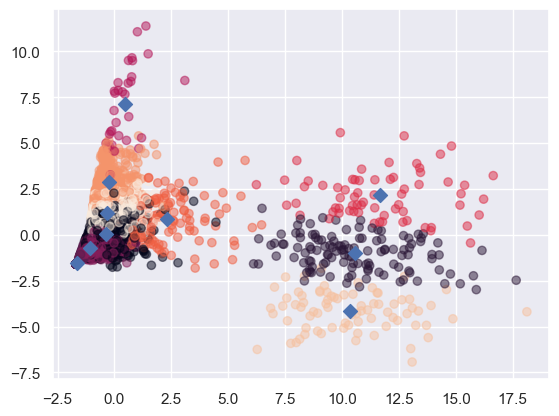

In [59]:
# scale data
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)

# construct components
pca = PCA(n_components=6)
embeddings = pca.fit_transform(attributes_scaled)

# perform k-mean clustering
model = KMeans(n_clusters=10)
labels = model.fit_predict(embeddings)


# for 2D plot: use best components
xs = embeddings[:,0]
ys = embeddings[:,1]

plt.scatter(xs, ys, c=labels, alpha = 0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker="D", s=50)
plt.show()

### Evaluate clustering

c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

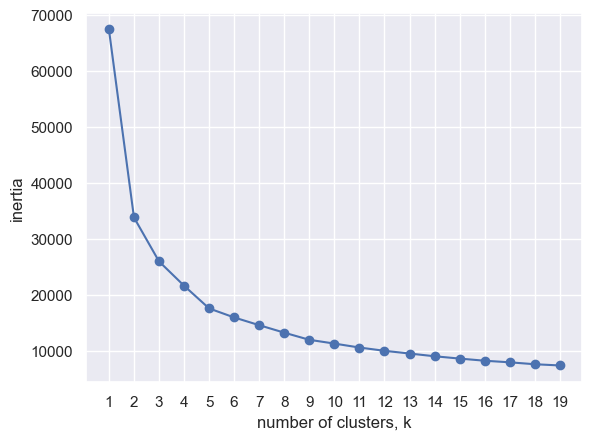

In [60]:
ks = range(1, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(embeddings)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


### Crosstable

In [61]:
positions = df['Pos'].values.tolist()

eval_df =  pd.DataFrame({'labels':labels, 'position': positions})

ct = pd.crosstab(eval_df['labels'], eval_df['position'])
ct

position,0,DF,"DF,FW","DF,MF",FW,"FW,DF","FW,MF",GK,MF,"MF,DF","MF,FW"
labels,,,,,,,,,,,
0,0,172,6,17,171,13,138,3,96,13,100
1,121,0,0,0,0,0,0,0,1,0,0
2,0,214,17,18,65,3,30,289,145,11,25
3,0,435,23,66,52,7,88,2,325,50,86
4,0,11,2,1,6,3,1,0,4,1,2
5,67,0,0,0,0,0,0,0,0,0,0
6,3,4,0,2,63,0,20,0,19,0,15
7,0,137,7,22,70,3,49,0,46,6,31
8,77,0,0,0,0,0,0,0,0,0,0


In [62]:
from scipy.stats import chi2_contingency

# Assuming `crosstab` is a pandas DataFrame containing your cross table
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi-square statistic: 6159.191001014979
P-value: 0.0
Degrees of freedom: 90


### Hieracal Clustering

In [63]:
# Calculate the linkage: mergings
"""
mergings = linkage(embeddings, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=positions,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()
"""

"\nmergings = linkage(embeddings, method='complete')\n\n# Plot the dendrogram, using varieties as labels\ndendrogram(mergings,\n           labels=positions,\n           leaf_rotation=90,\n           leaf_font_size=6,\n)\nplt.show()\n"

## PCA & K-Mean clustering - Possession

In [64]:
df = pd.read_csv("../data/fbref/raw/possession.csv")
df = df[df['Unnamed: 0_level_0_Player'] == 'Squad Total']


df = df.fillna(0)
df_attributes = df.drop(columns=['Unnamed: 4_level_0_90s','Season', 'League', 'Team', 'Unnamed: 0_level_0_Player', 'Unnamed: 1_level_0_Nation', 'Unnamed: 2_level_0_Pos'
                                 , 'Unnamed: 3_level_0_Age','Unnamed: 27_level_0_Matches', 'S_e',
       'L_e', 'T_e', 'U_n', 'U_n.1', 'U_n.2', 'U_n.3', 'U_n.4', 'T_o', 'T_o.1',
       'T_o.2', 'T_o.3', 'T_o.4', 'T_o.5', 'T_o.6', 'T_a', 'T_a.1', 'T_a.2',
       'T_a.3', 'T_a.4', 'C_a', 'C_a.1', 'C_a.2', 'C_a.3', 'C_a.4', 'C_a.5',
       'C_a.6', 'C_a.7', 'R_e', 'R_e.1', 'U_n.5'])


df_attributes
attributes = df_attributes.to_numpy()

C:\Users\Alexander Lorenz\AppData\Local\Temp\ipykernel_16980\401562583.py:1: DtypeWarning: Columns (31,32,33,34,35,36,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/fbref/raw/possession.csv")


### Cluster

c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


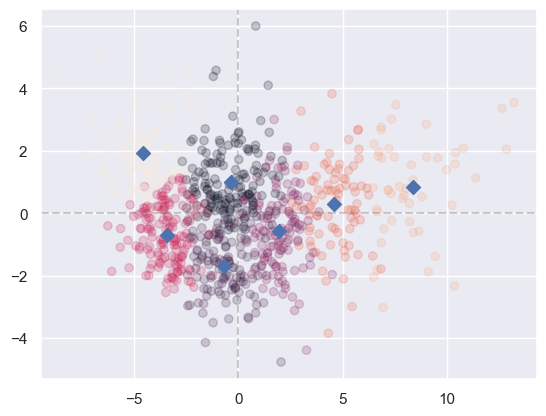

In [65]:
# scale data
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)

# construct components
pca = PCA(n_components=6)
components = pca.fit_transform(attributes_scaled)

# perform k-mean clustering
model = KMeans(n_clusters=7)
labels = model.fit_predict(components)


# for 2D plot: use best components
xs = components[:,0]
ys = components[:,1]

plt.scatter(xs, ys, c=labels, alpha = 0.2)
plt.axhline(ys.mean(), color='grey', linestyle='dashed', alpha = 0.4)
plt.axvline(xs.mean(), color='grey', linestyle='dashed', alpha = 0.4)

#plt.ayhline(xs.mean(), color='grey', linestyle='dashed')

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker="D", s=50)
plt.show()

### Predict player to cluster

[[-18.70059588   5.68922525  11.35803181   1.64037771  -3.06129337
    1.45667354]]


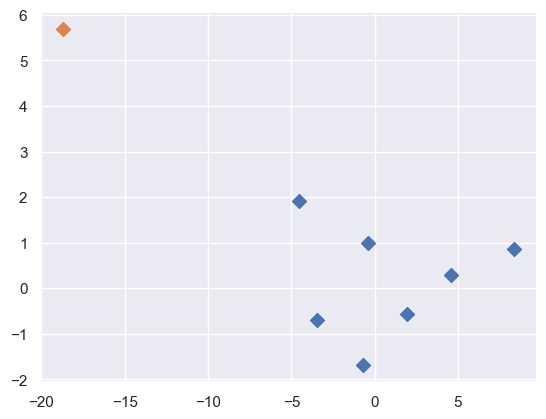

In [66]:
# Pick player
player_df = dataframes['possession']
player_df = player_df[player_df["Player"] == "David Raum"]
player_df = player_df.drop(columns=['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age'])

idx = 633

attributes = player_df.to_numpy()
attributes

# scale and create components
player_scaled_attributes = scaler.transform(attributes)
player_embedding = pca.transform(player_scaled_attributes)

print(player_embedding)

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker="D", s=50)
plt.scatter(player_embedding[:,0], player_embedding[:,1], marker="D", s=50)
plt.show()


### Throw player into football team dataset

In [67]:
#query player 
query_player = 'Thomas Müller'

# get player
player_df = dataframes['possession']
player_df = player_df.dropna()
#player_df = player_df[player_df["Player"] == query_player]


# all teams
df = pd.read_csv("../data/fbref/raw/possession.csv")
df = df[df['Unnamed: 0_level_0_Player'] == 'Squad Total']
df = df[df['Season'] == '2022-2023']

rename = {
    'Unnamed: 4_level_0_90s': '90s',
    'Unnamed: 0_level_0_Player': 'Player',
    'Unnamed: 1_level_0_Nation': 'Nation',
    'Unnamed: 2_level_0_Pos': 'Pos',
    'Unnamed: 3_level_0_Age': 'Age'

}
df = df.rename(columns=rename)

df_team = df.drop(columns=['Unnamed: 27_level_0_Matches', 'S_e',
       'L_e', 'T_e', 'U_n', 'U_n.1', 'U_n.2', 'U_n.3', 'U_n.4', 'T_o', 'T_o.1',
       'T_o.2', 'T_o.3', 'T_o.4', 'T_o.5', 'T_o.6', 'T_a', 'T_a.1', 'T_a.2',
       'T_a.3', 'T_a.4', 'C_a', 'C_a.1', 'C_a.2', 'C_a.3', 'C_a.4', 'C_a.5',
       'C_a.6', 'C_a.7', 'R_e', 'R_e.1', 'U_n.5'])

features = ['Touches_Touches', 'Touches_Def Pen', 'Touches_Def 3rd',
       'Touches_Mid 3rd', 'Touches_Att 3rd', 'Touches_Att Pen', 'Touches_Live',
       'Take-Ons_Att', 'Take-Ons_Succ', 'Take-Ons_Succ%', 'Take-Ons_Tkld',
       'Take-Ons_Tkld%', 'Carries_Carries', 'Carries_TotDist',
       'Carries_PrgDist', 'Carries_PrgC', 'Carries_1/3', 'Carries_CPA',
       'Carries_Mis', 'Carries_Dis', 'Receiving_Rec', 'Receiving_PrgR']


df_team[features] = df[features].dropna()
player_df[features] = player_df[features].dropna()


# scale data
scaler = StandardScaler()
normalizer = Normalizer()

df_team[features] =  normalizer.fit_transform(df_team[features])
player_df[features] =  normalizer.fit_transform(player_df[features])

df_concat = pd.concat([player_df, df_team], ignore_index=True)

display(player_df)

C:\Users\Alexander Lorenz\AppData\Local\Temp\ipykernel_16980\4122526977.py:11: DtypeWarning: Columns (31,32,33,34,35,36,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/fbref/raw/possession.csv")
C:\Users\Alexander Lorenz\AppData\Local\Temp\ipykernel_16980\4122526977.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df[features] = player_df[features].dropna()
C:\Users\Alexander Lorenz\AppData\Local\Temp\ipykernel_16980\4122526977.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,Season,League,Team,Player,Nation,Pos,Age,Touches_Touches,Touches_Def Pen,Touches_Def 3rd,...,Carries_Carries,Carries_TotDist,Carries_PrgDist,Carries_PrgC,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Rec,Receiving_PrgR
1,2022-2023,EPL,Manchester City,Rodri,ESP,MF,26.0,0.247946,0.009018,0.053499,...,0.151860,0.779985,0.426025,0.005759,0.005456,0.000227,0.001591,0.001440,0.190279,0.002804
2,2022-2023,EPL,Manchester City,Erling Haaland,NOR,FW,22.0,0.295363,0.006968,0.015097,...,0.156778,0.781957,0.294589,0.013549,0.003871,0.009678,0.019742,0.010065,0.225684,0.058453
3,2022-2023,EPL,Manchester City,Kevin De Bruyne,BEL,MF,31.0,0.247630,0.001731,0.013313,...,0.150309,0.761663,0.454654,0.013313,0.010784,0.002130,0.005592,0.003861,0.192379,0.032618
4,2022-2023,EPL,Manchester City,İlkay Gündoğan,GER,MF,31.0,0.261258,0.004484,0.035153,...,0.155077,0.789415,0.380169,0.007667,0.006365,0.001013,0.004051,0.003906,0.206142,0.017938
5,2022-2023,EPL,Manchester City,Manuel Akanji,SUI,DF,27.0,0.208682,0.011318,0.076233,...,0.144422,0.789736,0.471335,0.002245,0.003741,0.000094,0.001122,0.000281,0.162194,0.001590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4255,2022-2023,PrimeiraLiga,Santa Clara,Walter González,PAR,FW,27.0,0.304676,0.016926,0.029017,...,0.145084,0.756853,0.304676,0.012090,0.009672,0.002418,0.019344,0.012090,0.224880,0.026599
4256,2022-2023,PrimeiraLiga,Santa Clara,Pedro Bicalho,BRA,"MF,FW",21.0,0.367862,0.007664,0.061310,...,0.172435,0.639927,0.141780,0.000000,0.000000,0.000000,0.019159,0.003832,0.222250,0.022991
4258,2022-2023,PrimeiraLiga,Santa Clara,Filip Stevanovic,SRB,"FW,MF",19.0,0.378904,0.005741,0.028705,...,0.137783,0.620024,0.304271,0.017223,0.011482,0.005741,0.017223,0.011482,0.218157,0.034446
4259,2022-2023,PrimeiraLiga,Santa Clara,Rodrigo Valente,POR,"MF,FW",21.0,0.277304,0.022184,0.066553,...,0.127560,0.737629,0.393772,0.011092,0.011092,0.005546,0.005546,0.005546,0.177475,0.005546


In [68]:
#df_ex.columns

In [69]:
# construct components
pca = PCA(n_components=6)
embeddings = pca.fit_transform(df_concat[features])
pca_df = pd.DataFrame(embeddings, columns=[f'PCA_{i+1}' for i in range(embeddings.shape[1])])
df_concat = pd.concat([df_concat, pca_df], axis=1)

# perform k-mean clustering
df_ex = df_concat[df_concat['Player'] == "Squad Total"]
components = [ 'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6']
model = KMeans(n_clusters=3)
labels = model.fit_predict(df_ex[components])

c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [70]:
df_concat[df_concat['Player'] == query_player]['PCA_2'].values[0]

0.1756510109853449

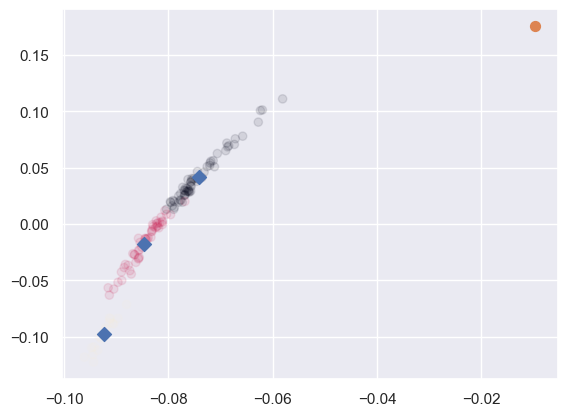

In [71]:
# for 2D plot: use best components
xs = df_ex['PCA_1'].to_numpy()
ys = df_ex['PCA_2'].to_numpy()
plt.scatter(xs, ys, c=labels, alpha = 0.1)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x, centroids_y, marker="D", s=50)

# query player coordinates
x_query = df_concat[df_concat['Player'] == query_player]['PCA_1'].values[0]# df_concat[df_concat['Player'] == query_player]['PCA_1'][0]
y_query = df_concat[df_concat['Player'] == query_player]['PCA_2'].values[0]# df_concat[df_concat['Player'] == query_player]['PCA_2'][0]
plt.scatter(x_query, y_query, s=50)



plt.show()


### Evaluate clustering

c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

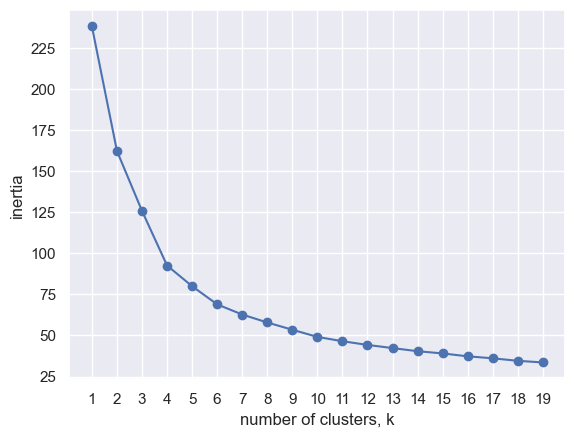

In [72]:
ks = range(1, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(embeddings)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alexander Lorenz\anaconda3\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

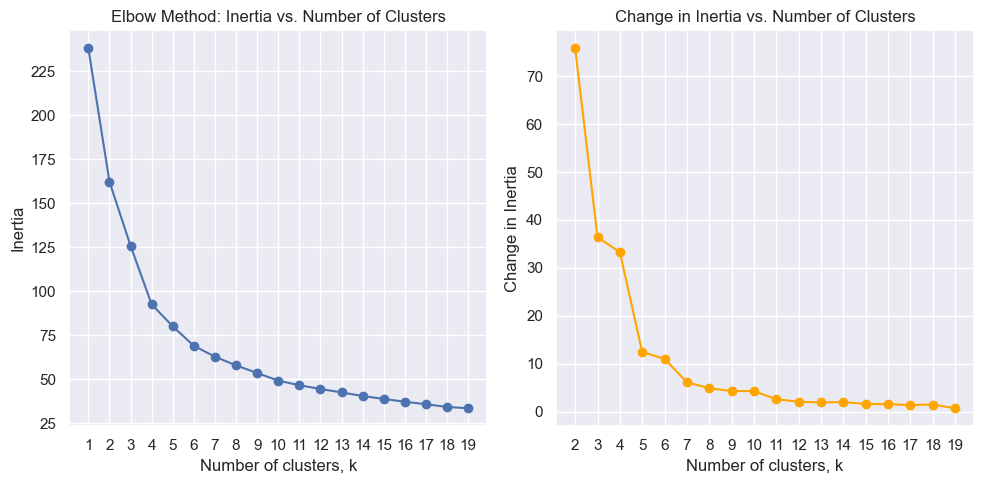

In [73]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ks = range(1, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(embeddings)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Calculate the changes in inertia
inertia_changes = [inertias[i] - inertias[i + 1] for i in range(len(inertias) - 1)]

# Plot ks vs inertias
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method: Inertia vs. Number of Clusters')
plt.xticks(ks)

# Plot changes in inertia
plt.subplot(1, 2, 2)
plt.plot(ks[1:], inertia_changes, '-o', color='orange')
plt.xlabel('Number of clusters, k')
plt.ylabel('Change in Inertia')
plt.title('Change in Inertia vs. Number of Clusters')
plt.xticks(ks[1:])

plt.tight_layout()
plt.show()


## Cosine Similarity

In [74]:
# load and prepare data
# load, set index, and seperate into stats and player information
df = pd.read_csv('../data/fbref/player_stats.csv')
#df = df.drop('Player.1',axis='columns')
df = df.set_index(df['Player'], drop=True)
l = ['unique_id','Season','League','Team','Player',	'Nation',	'Pos',	'Age', 'Global Pos']
player_info = df[l]

# keep only the features
features = [col for col in df.columns if col not in l]
df = df[features]

# handle NaN 
df = df.fillna(1)

### Player vs. Player

#### raw

In [75]:
embeddings_df = pd.DataFrame(df, index=df.index)
# Get the query player's raw data ('Christopher Nkunku')
query_player = embeddings_df.loc['Xavi Simons']

# Normalize embeddings and the query player vector
embeddings_norm = embeddings_df.div(np.linalg.norm(embeddings_df, axis=1), axis=0)
query_player_norm = query_player / np.linalg.norm(query_player)

# Compute cosine similarities (dot product of normalized vectors)
cosine_similarities = embeddings_norm.dot(query_player_norm)

# get top 10 most similar players
top_similar_players = cosine_similarities.nlargest(10)
print(top_similar_players)


Player
Xavi Simons              1.000000
Javairô Dilrosun         0.999564
Samuel Chukwueze         0.999350
Antony                   0.999108
Bukayo Saka              0.998971
Khvicha Kvaratskhelia    0.998845
Marcus Edwards           0.998815
Bruma                    0.998752
Paulo Vitor              0.998513
Samuel Lino              0.998502
dtype: float64


#### Standard Scaler & PCA

In [76]:
# pipeline: scale and create principal components
scaler = StandardScaler()
pca = PCA(n_components=25)
pipeline = make_pipeline(scaler,pca)
embeddings = pipeline.fit_transform(df)

# create df embeddings and get query player
embeddings_df = pd.DataFrame(embeddings,index=df.index)
query_player = embeddings_df.loc['Xavi Simons']

# Normalize both embeddings_df and query_player
embeddings_norm = embeddings_df.div(np.linalg.norm(embeddings_df, axis=1), axis=0)
query_player_norm = query_player / np.linalg.norm(query_player)

# Compute cosine similarities
similarities = embeddings_norm.dot(query_player_norm)
print(similarities.nlargest(10))

Player
Xavi Simons              1.000000
Khvicha Kvaratskhelia    0.976742
Rafa Silva               0.961541
Serge Gnabry             0.940703
Brahim Díaz              0.938862
Randal Kolo Muani        0.938296
Rodrygo                  0.936074
Christopher Nkunku       0.935126
Domenico Berardi         0.928281
Jack Grealish            0.927072
dtype: float64


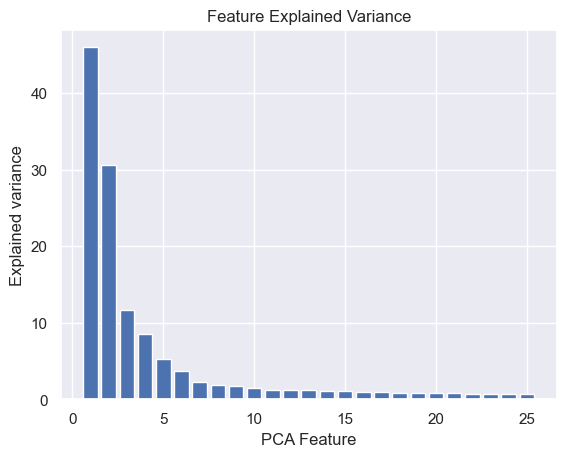

In [77]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

#### Normalizer

In [78]:
# pipeline: scale and create principal components
normalizer = Normalizer()
pca = PCA(n_components=15)
pipeline = make_pipeline(normalizer,pca)
embeddings = pipeline.fit_transform(df)

# create df embeddings and get query player
embeddings_df = pd.DataFrame(embeddings,index=df.index)
query_player = embeddings_df.loc['Christopher Nkunku']

# Normalize both embeddings_df and query_player
embeddings_norm = embeddings_df.div(np.linalg.norm(embeddings_df, axis=1), axis=0)
query_player_norm = query_player / np.linalg.norm(query_player)

# Compute cosine similarities
similarities = embeddings_norm.dot(query_player_norm)
print(similarities.nlargest(10))

Player
Christopher Nkunku    1.000000
Dani Rodríguez        0.996906
Christian Kouamé      0.995737
Jacopo Fazzini        0.995594
Denis Huseinbasic     0.995366
Alexis Sánchez        0.994818
Dejan Ljubicic        0.993598
Luciano Valente       0.992426
Marco Reus            0.992294
Matchoi Djaló         0.991964
dtype: float64


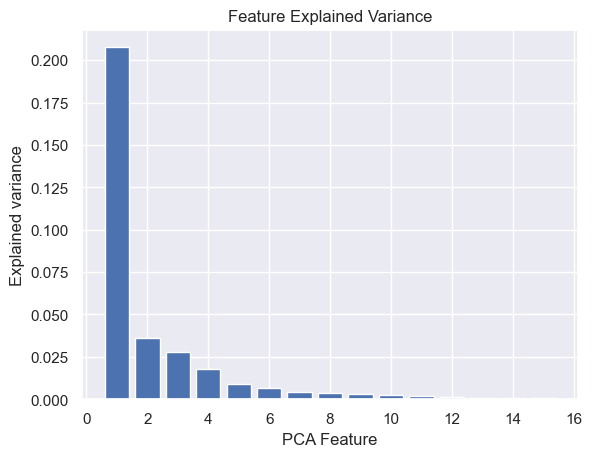

In [79]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

#### Min Max Scaler

In [80]:
# pipeline: scale and create principal components
scaler = MinMaxScaler()
pca = PCA(n_components=15)
pipeline = make_pipeline(scaler,pca)
embeddings = pipeline.fit_transform(df)

# create df embeddings and get query player
embeddings_df = pd.DataFrame(embeddings,index=df.index)
query_player = embeddings_df.loc['Christopher Nkunku']

# Normalize both embeddings_df and query_player
embeddings_norm = embeddings_df.div(np.linalg.norm(embeddings_df, axis=1), axis=0)
query_player_norm = query_player / np.linalg.norm(query_player)

# Compute cosine similarities
similarities = embeddings_norm.dot(query_player_norm)
print(similarities.nlargest(10))

Player
Christopher Nkunku    1.000000
Rafa Silva            0.967626
Ciro Immobile         0.966710
Dany Mota             0.966232
Vangelis Pavlidis     0.965434
Robert Lewandowski    0.965163
Timo Werner           0.960114
Marcus Rashford       0.959018
Mehdi Taremi          0.958176
Wissam Ben Yedder     0.954393
dtype: float64


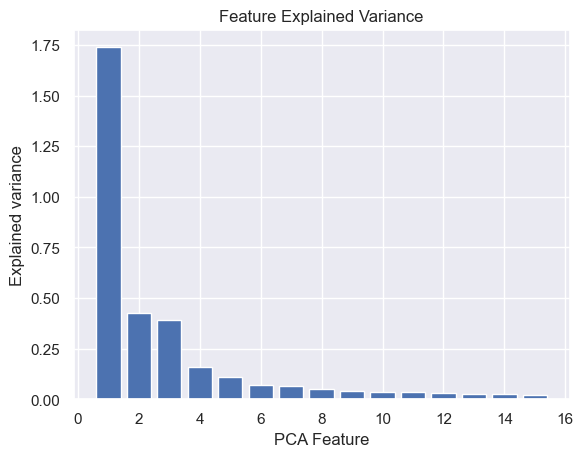

In [81]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

### Player vs. Team

In [82]:
player_df = dataframes['possession']
player_df.set_index(player_df['Player'])

,Season,League,Team,Player,Nation,Pos,Age,Touches_Touches,Touches_Def Pen,Touches_Def 3rd,...,Carries_Carries,Carries_TotDist,Carries_PrgDist,Carries_PrgC,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Rec,Receiving_PrgR
Player,,,,,,,,,,,,,,,,,,,,,
Ederson,2022-2023,EPL,Manchester City,Ederson,BRA,GK,28.0,1302.0,1049.0,1295.0,...,869.0,4059.0,2429.0,0.0,0.0,0.0,0.0,0.0,833.0,0.0
Rodri,2022-2023,EPL,Manchester City,Rodri,ESP,MF,26.0,3272.0,119.0,706.0,...,2004.0,10293.0,5622.0,76.0,72.0,3.0,21.0,19.0,2511.0,37.0
Erling Haaland,2022-2023,EPL,Manchester City,Erling Haaland,NOR,FW,22.0,763.0,18.0,39.0,...,405.0,2020.0,761.0,35.0,10.0,25.0,51.0,26.0,583.0,151.0
Kevin De Bruyne,2022-2023,EPL,Manchester City,Kevin De Bruyne,BEL,MF,31.0,1860.0,13.0,100.0,...,1129.0,5721.0,3415.0,100.0,81.0,16.0,42.0,29.0,1445.0,245.0
İlkay Gündoğan,2022-2023,EPL,Manchester City,İlkay Gündoğan,GER,MF,31.0,1806.0,31.0,243.0,...,1072.0,5457.0,2628.0,53.0,44.0,7.0,28.0,27.0,1425.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rodrigo Valente,2022-2023,PrimeiraLiga,Santa Clara,Rodrigo Valente,POR,"MF,FW",21.0,50.0,4.0,12.0,...,23.0,133.0,71.0,2.0,2.0,1.0,1.0,1.0,32.0,1.0
Rui Costa,2022-2023,PrimeiraLiga,Santa Clara,Rui Costa,POR,MF,26.0,16.0,0.0,0.0,...,10.0,38.0,3.0,0.0,0.0,0.0,1.0,0.0,13.0,2.0
Rúben Alexandre Gomes Oliveira,2022-2023,PrimeiraLiga,Santa Clara,Rúben Alexandre Gomes Oliveira,POR,MF,27.0,14.0,1.0,3.0,...,3.0,18.0,10.0,0.0,1.0,0.0,1.0,0.0,8.0,1.0


In [83]:
#query player 
query_player = 'Xavi Simons'

# get player
player_df = dataframes['possession']
player_df = player_df.dropna()
#player_df = player_df[player_df["Player"] == query_player]


# all teams
df = pd.read_csv("../data/fbref/raw/possession.csv")
df = df[df['Unnamed: 0_level_0_Player'] == 'Squad Total']
df = df[df['Season'] == '2022-2023']

rename = {
    'Unnamed: 4_level_0_90s': '90s',
    'Unnamed: 0_level_0_Player': 'Player',
    'Unnamed: 1_level_0_Nation': 'Nation',
    'Unnamed: 2_level_0_Pos': 'Pos',
    'Unnamed: 3_level_0_Age': 'Age'

}
df = df.rename(columns=rename)

df_team = df.drop(columns=['Unnamed: 27_level_0_Matches', 'S_e',
       'L_e', 'T_e', 'U_n', 'U_n.1', 'U_n.2', 'U_n.3', 'U_n.4', 'T_o', 'T_o.1',
       'T_o.2', 'T_o.3', 'T_o.4', 'T_o.5', 'T_o.6', 'T_a', 'T_a.1', 'T_a.2',
       'T_a.3', 'T_a.4', 'C_a', 'C_a.1', 'C_a.2', 'C_a.3', 'C_a.4', 'C_a.5',
       'C_a.6', 'C_a.7', 'R_e', 'R_e.1', 'U_n.5'])

features = ['Touches_Touches', 'Touches_Def Pen', 'Touches_Def 3rd',
       'Touches_Mid 3rd', 'Touches_Att 3rd', 'Touches_Att Pen', 'Touches_Live',
       'Take-Ons_Att', 'Take-Ons_Succ', 'Take-Ons_Succ%', 'Take-Ons_Tkld',
       'Take-Ons_Tkld%', 'Carries_Carries', 'Carries_TotDist',
       'Carries_PrgDist', 'Carries_PrgC', 'Carries_1/3', 'Carries_CPA',
       'Carries_Mis', 'Carries_Dis', 'Receiving_Rec', 'Receiving_PrgR']
df_team = df_team.set_index(df_team['Team'])


player_df[features] = player_df[features].dropna()



# scale data
scaler = StandardScaler()
normalizer = Normalizer()

df_team[features] =  scaler.fit_transform(df_team[features])
player_df[features] =  scaler.fit_transform(player_df[features])


C:\Users\Alexander Lorenz\AppData\Local\Temp\ipykernel_16980\3449477066.py:11: DtypeWarning: Columns (31,32,33,34,35,36,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/fbref/raw/possession.csv")
C:\Users\Alexander Lorenz\AppData\Local\Temp\ipykernel_16980\3449477066.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df[features] = player_df[features].dropna()
C:\Users\Alexander Lorenz\AppData\Local\Temp\ipykernel_16980\3449477066.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [84]:
## TODO:  False computation
similiraties = df_team[features].dot(player_df[features].iloc[2919])
similiraties.nlargest(10)

Team
Paris S-G          39.682129
Manchester City    34.330064
Real Madrid        33.443800
Barcelona          32.391244
Napoli             30.199490
Lyon               26.626977
Ajax               24.589771
Lille              24.464887
Liverpool          23.348141
Chelsea            22.231909
dtype: float64